# Flexible unsupervised binary change detection algorithm identifies phase transitions in continuous image streams

### Paul Chao <sup>1</sup> , Xianghui Xiao <sup>2</sup>, and Ashwin J. Shahani <sup>1</sup> 

<sup>1</sup> University of Michigan, Ann Arbor
<sup>2</sup> Brookhaven National Laboratory, Upton, NY

**Abstract**: Sequences of projection images collected during in-situ tomography experiments can capture the formation of
patterns in crystallization and yield their three-dimensional growth morphologies. These image streams generate
enormous and high dimensional datasets that span the full extent of a phase transition. Detecting from the continuous
image stream the characteristic times and temperatures at which the phase transition initiates is a challenge because
the phase change is often swift and subtle. Here we show a flexible unsupervised binary classification algorithm
to identify a change point during data intensive experiments. The algorithm makes a prediction based on statistical
metrics and has a quantifiable error bound. Applied to two in-situ X-ray tomography experimental datasets collected
at a synchrotron light source, the developed method can detect the moment at which the solid phase emerges from the
parent liquid phase upon crystallization and without performing computationally expensive volume reconstructions.
Our approach is verified using a simulated X-ray phantom and its performance evaluated with respect to solidification
parameters. The method presented here can be broadly applied to other big data problems where time series can be
classified without the need for additional training data.  

Keywords: Solidification, nucleation, machine learning, sinogram, x-ray tomography

In [3]:
# Import the functions to process the examples
from sinogram_functions import prepare_sinogram, save_sino, digitizetolevels, analyze_sinogram

In [4]:
import time
import numpy as np
import sys, os

## Case Study #1: Formation of quasicrystal

## Slice 650: visible reconstruction for t=40,000

File: C:\Users\pchao\Documents\000_Sinogram\Example\For github\data_QC_650.npy
 ** Time to import: 0.22 seconds
 *** Clustering Results
Critical point: 10582
Range of critical point (60% threshold): (10444, 10740)
Range of critical point (70% threshold): (10326, 11068)
Range of critical point (80% threshold): (10164, 11781)
 ** Time to analyze: 3.66 seconds
 In the full dataset, time of critical point identified at: 42328
 In the downsampled dataset, time of critical point identified at: 10582


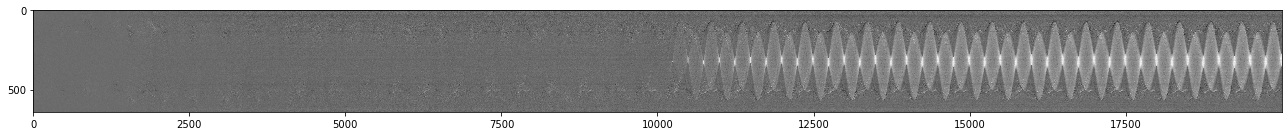

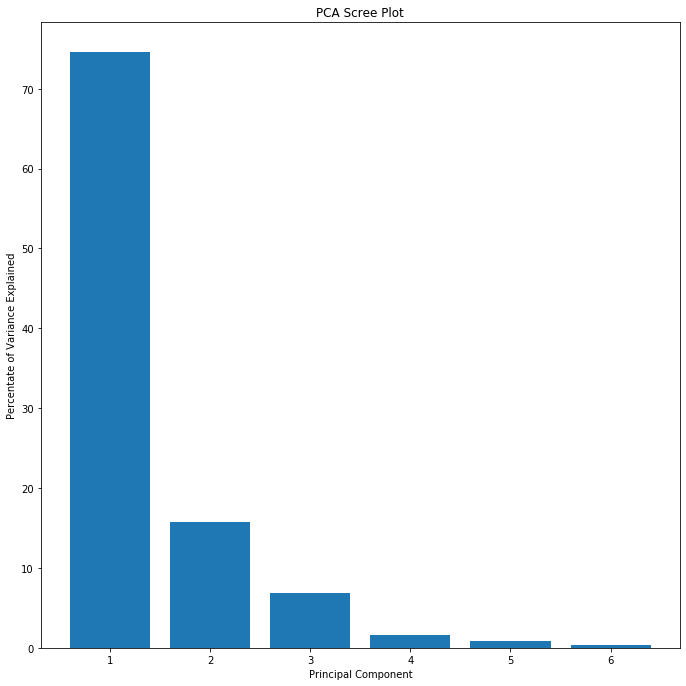

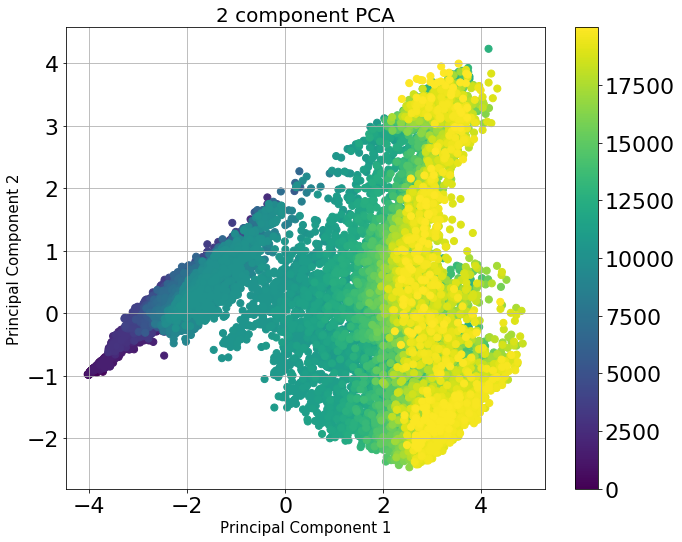

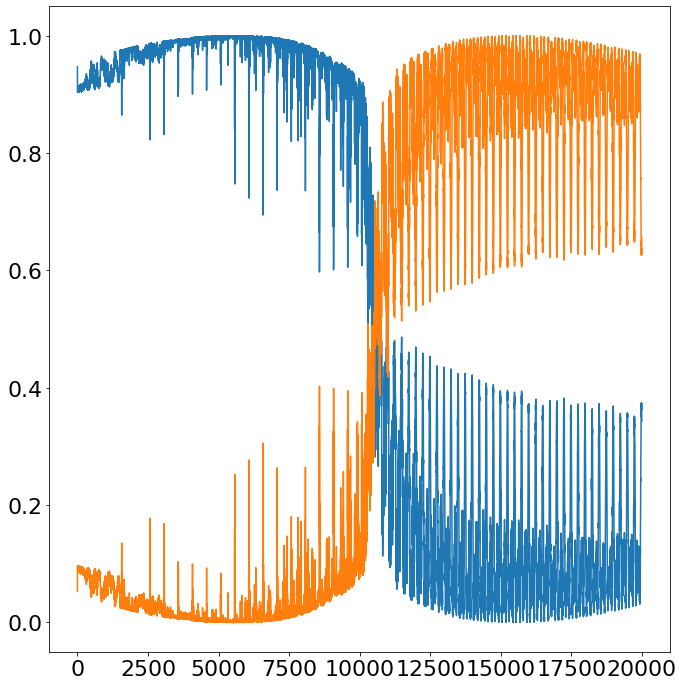

In [5]:
#Specify path to the example file, this corresponds to the 650th slice in the final volume. 
filename = 'data_QC_650.npy'
filepath = os.path.join(sys.path[0], filename)

#Begin timer
start_time = time.time()

# Import sinogram
sinogram_orig = np.load(filepath)
print('File: ' + filepath)
print(' ** Time to import: {:0.2f} seconds'.format(time.time()-start_time))

# Define the period (number of projections in a full 360 degree rotation). This will be used during normalization.
# For this dataset, 2000 projections are collected in a full 360 degree rotation. 
period = 2000
downsample = 4

# Prepare the sinogram (i.e. background normalization)
sinogram = prepare_sinogram(sinogram_orig, period=period, downsamplescale=downsample, numLiq=3, keepLiq=True)

# Save the processed results
save_sino(sinogram, 'sino_cs1.png')

# descretize the data 
sinogram = digitizetolevels(sinogram)

# Perform analysis
start_time = time.time()
critical_pt = analyze_sinogram(sinogram, period//downsample, save=True)
print(' ** Time to analyze: {:0.2f} seconds'.format(time.time()-start_time))

print(' In the full dataset, time of critical point identified at: ' + str(critical_pt[0]*downsample))
print(' In the downsampled dataset, time of critical point identified at: ' + str(critical_pt[0]))

## Case Study #2: Formation of primary silicon in a chemically-modified alloy

## Slice 50: visible at t=52500

In [ ]:
#Specify path to the example file, this corresponds to the 50th slice in the final volume. 
filename = 'data_AlSiSr_50.npy'
filepath = os.path.join(sys.path[0], filename)

start_time = time.time()

#Import and process sinogram
sinogram_orig = np.load(filepath)
print('File: ' + filepath)
print(' ** Time to import: {:0.2f} seconds'.format(time.time()-start_time))

# Define the period (number of projections in a full 360 degree rotation). This will be used during normalization
period=3000
downsample = 10

# Prepare the sinogram (i.e. background normalization)
sinogram = prepare_sinogram(sinogram_orig, period=period, downsamplescale=downsample, numLiq=3, keepLiq=True)

# Save the processed results
save_sino(sinogram, 'sino_cs2.png')

# descretize the data 
data = digitizetolevels(sinogram)

# Perform analysis
start_time = time.time()
critical_pt = analyze_sinogram(data, period/downsample, save=True)
print(' ** Time to analyze: {:0.2f} seconds'.format(time.time()-start_time))

print(' In the full dataset, time of critical point identified at: ' + str(critical_pt[0]*downsample))
print(' In the downsampled dataset, time of critical point identified at: ' + str(critical_pt[0]))